In [1]:
!pip install gdax

    100% |████████████████████████████████| 593kB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 102kB 5.6MB/s a 0:00:011
    100% |████████████████████████████████| 204kB 4.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for bintrees ... done
  Stored in directory: /Users/Dereck/Library/Caches/pip/wheels/86/6a/69/d6faab770edfb66165e9ab37295ae29800eaf1ce98b9207020
  Running setup.py bdist_wheel for websocket-client ... done
  Stored in directory: /Users/Dereck/Library/Caches/pip/wheels/d1/5e/dd/93da015a0ecc8375278b05ad7f0452eff574a044bcea2a95d2
Successfully built bintrees websocket-client
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
  Found existing installation: requests 2.18.1
    Uninstalling requests-2.18.1:
      Successfully uninstalled requests-2.18.1


In [1]:
import json
import base64, hashlib, hmac, time
import requests
import pandas as pd
import numpy as np
import gdax
from requests.auth import AuthBase
from websocket import create_connection
from pymongo import MongoClient
from pprint import pprint
from sklearn.metrics import mean_squared_error
import math
import time
from datetime import datetime
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
import pause
import datetime
from PIL import Image
import requests
from io import BytesIO
import pyflux as pf

/Users/Dereck/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def df_maker(a_list):
    ''' takes GDAX API returned list and creates a pandas df '''
    df = pd.DataFrame(a_list)
    df.columns = ['time', 'low', 'high', 'open', 'close', 'volume']
    df.time = pd.to_datetime(df.time, unit='s')
    df.index = df.time
    df = df.drop(df.columns[0], axis=1)
    df = df.iloc[::-1]
    df.drop(df.tail(1).index,inplace=True)
    return df

In [3]:
def df_maker_future(a_list):
    ''' takes GDAX API returned list and creates a pandas df '''
    df = pd.DataFrame(a_list)
    df.columns = ['time', 'low', 'high', 'open', 'close', 'volume']
    df.time = pd.to_datetime(df.time, unit='s')
    df.index = df.time
    df = df.drop(df.columns[0], axis=1)
    df = df.iloc[::-1]
    #df.drop(df.tail(1).index,inplace=True)
    return df

In [12]:
timestamp = str(time.time())
message = timestamp + request.method + request.path_url + (request.body or '')
hmac_key = base64.b64decode(secret_key)
signature = hmac.new(hmac_key, message.encode('utf-8'), hashlib.sha256)

AttributeError: module 'requests' has no attribute 'method'

In [7]:
class GDAXRequestAuth(AuthBase):
    def __init__(self, api_key, secret_key, passphrase):
        self.api_key = api_key
        self.secret_key = secret_key
        self.passphrase = passphrase
    
    def __call__(self, request):
        timestamp = str(time.time())
        message = timestamp + request.method + request.path_url + (request.body or '')
        hmac_key = base64.b64decode(self.secret_key)
        signature = hmac.new(hmac_key, message.encode('utf-8'), hashlib.sha256)
        signature_b64 = base64.b64encode(signature.digest())
        request.headers.update({
            'CB-ACCESS-SIGN': signature_b64,
            'CB-ACCESS-TIMESTAMP': timestamp,
            'CB-ACCESS-KEY': self.api_key,
            'CB-ACCESS-PASSPHRASE': self.passphrase,
            'Content-Type': 'application/json'
        })
        return request

In [56]:
api_base = 'https://api-public.sandbox.gdax.com'
api_key = secret
api_secret = secret
passphrase = secret

# use our request auth object
auth = GDAXRequestAuth(api_key, api_secret, passphrase)
order_url = api_base + '/orders'
order_data = {
    'type': 'market',
    'side': 'buy',
    'product_id': 'BTC-USD',
    'size': '0.01'
}
response = requests.post(order_url, data=json.dumps(order_data), auth=auth)
print(response.json())

{'message': 'Invalid API Key'}


In [9]:
api_base = 'https://api-public.sandbox.gdax.com'
response = requests.get(api_base + '/products')
print(response.json())

[{'id': 'BTC-USD', 'base_currency': 'BTC', 'quote_currency': 'USD', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/USD', 'status': 'online', 'margin_enabled': True, 'status_message': None, 'min_market_funds': None, 'max_market_funds': None, 'post_only': False, 'limit_only': False, 'cancel_only': False}, {'id': 'BTC-GBP', 'base_currency': 'BTC', 'quote_currency': 'GBP', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/GBP', 'status': 'online', 'margin_enabled': False, 'status_message': None, 'min_market_funds': None, 'max_market_funds': None, 'post_only': False, 'limit_only': False, 'cancel_only': False}, {'id': 'BTC-EUR', 'base_currency': 'BTC', 'quote_currency': 'EUR', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/EUR', 'status': 'online', 'margin_enabled': False, 'status_message': None, 'min_market_funds': None, 'max_market_funds':

In [45]:
api_base = 'https://api-public.sandbox.gdax.com'
response = requests.get(api_base + '/products')
print(response.json())

[{'id': 'BTC-USD', 'base_currency': 'BTC', 'quote_currency': 'USD', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/USD', 'status': 'online', 'margin_enabled': True, 'status_message': None, 'min_market_funds': None, 'max_market_funds': None, 'post_only': False, 'limit_only': False, 'cancel_only': False}, {'id': 'BTC-GBP', 'base_currency': 'BTC', 'quote_currency': 'GBP', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/GBP', 'status': 'online', 'margin_enabled': False, 'status_message': None, 'min_market_funds': None, 'max_market_funds': None, 'post_only': False, 'limit_only': False, 'cancel_only': False}, {'id': 'BTC-EUR', 'base_currency': 'BTC', 'quote_currency': 'EUR', 'base_min_size': '0.01', 'base_max_size': '10000', 'quote_increment': '0.01', 'display_name': 'BTC/EUR', 'status': 'online', 'margin_enabled': False, 'status_message': None, 'min_market_funds': None, 'max_market_funds':

In [46]:
def products():
    response = requests.get(api_base + '/products')
    # check for invalid api response
    if response.status_code is not 200:
        raise Exception('Invalid GDAX Status Code: %d' % response.status_code)
    return response.json()

In [48]:
import requests
import base64, hashlib, hmac, time


In [51]:
timestamp = str(time.time())
message = timestamp + request.method + request.path_url + (request.body or '')
hmac_key = base64.b64decode(secret_key)
signature = hmac.new(hmac_key, message.encode('utf-8'), hashlib.sha256)

AttributeError: 'function' object has no attribute 'method'

In [57]:
order_id = '4c5365c9-b1e0-4dea-ab87-c775e81509e1'
order_url = api_base + '/orders/' + order_id
response = requests.get(order_url, auth=auth)
print(response.json())

{'message': 'Invalid API Key'}


In [55]:
requests.request

<function requests.api.request>

In [ ]:
import json

from websocket import create_connection

In [87]:
ws = create_connection("wss://ws-feed.gdax.com")
#ws.connect("wss://api2.bitfinex.com:3000/ws")
ws.send(json.dumps({
    "type": "subscribe",
    "product_ids": [
        "LTC-USD"
    ],
    "channels": [
        "level2",
        "heartbeat",
        {
            "name": "ticker",
            "product_ids": [
                "LTC-USD"
            ]
        }
    ]
}))


while True:
    result = ws.recv()
    result = json.loads(result)
    print ("Received '%s'" % result)

ws.close()

Received '{'product_id': 'LTC-USD', 'type': 'snapshot', 'bids': [['156.2', '5'], ['156.01', '83.14530476'], ['156', '10'], ['155.98', '2'], ['155.95', '0.3'], ['155.86', '20'], ['155.85', '80.264'], ['155.78', '0.43205539'], ['155.76', '12.10943272'], ['155.75', '79.14577352'], ['155.73', '47'], ['155.71', '15.57517178'], ['155.7', '220.45601836'], ['155.69', '1.7989'], ['155.67', '21.7989'], ['155.65', '31.7989'], ['155.64', '7.60663959'], ['155.63', '0.3095'], ['155.62', '1469.929376'], ['155.61', '50'], ['155.6', '5'], ['155.59', '75.72073263'], ['155.58', '77.01418923'], ['155.56', '80.9823'], ['155.55', '200.8166'], ['155.53', '0.12822471'], ['155.52', '0.7738'], ['155.51', '30.8126'], ['155.5', '60.90229733'], ['155.49', '0.1'], ['155.48', '2'], ['155.47', '45.4257'], ['155.46', '0.3277'], ['155.45', '1.4712'], ['155.42', '27.364'], ['155.4', '2.4511'], ['155.39', '1.2464'], ['155.38', '0.1014'], ['155.36', '0.5'], ['155.35', '1'], ['155.34', '0.12828093'], ['155.33', '43.951'], 

Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.300Z', 'changes': [['buy', '153.98000000', '0.9']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.301Z', 'changes': [['buy', '156.19000000', '0.1']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.304Z', 'changes': [['buy', '156.19000000', '0']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.333Z', 'changes': [['buy', '154.31000000', '7.72285']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.343Z', 'changes': [['buy', '154.31000000', '14.24405']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.359Z', 'changes': [['buy', '153.93000000', '0.1']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:26.366Z', 'changes': [['buy', '156.20000000', '5.10008']]}'
Received '{'type': 'l2u

Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.491Z', 'changes': [['sell', '156.21000000', '92.78286852']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.492Z', 'changes': [['buy', '156.19000000', '0']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.502Z', 'changes': [['sell', '156.21000000', '92.88304852']]}'
Received '{'type': 'heartbeat', 'last_trade_id': 27818309, 'product_id': 'LTC-USD', 'sequence': 1823322027, 'time': '2018-03-19T19:49:28.656000Z'}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.838Z', 'changes': [['buy', '156.19000000', '0.1']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.877Z', 'changes': [['buy', '156.19000000', '0']]}'
Received '{'type': 'l2update', 'product_id': 'LTC-USD', 'time': '2018-03-19T19:49:28.965Z', 'changes': [['buy', '156.10000000', '1']]}'
Received '{'

KeyboardInterrupt: 

In [46]:
ws = create_connection("wss://ws-feed.gdax.com")
#ws.connect("wss://api2.bitfinex.com:3000/ws")
ws.send(json.dumps({
    "type": "subscribe",
    "channels": [{ "name": "ticker", "product_ids": ["LTC-USD"] }]
}))

while True:
    result = ws.recv()
    result = json.loads(result)
    with open('data.txt', 'a') as outfile:
        json.dump(result, outfile)
        outfile.write('\n')
        #print ("Received '%s'" % result)
# else:
#     with open('data.txt', 'a') as outfile:
#         json.dump(result, outfile)
#         outfile.writelines(result)

ws.close()

KeyboardInterrupt: 

In [11]:
import gdax
public_client = gdax.PublicClient()

In [12]:
public_client.get_product_24hr_stats('LTC-USD')

{'high': '175.50000000',
 'last': '173.75000000',
 'low': '160.30000000',
 'open': '160.30000000',
 'volume': '438982.75062687',
 'volume_30day': '13491252.59858915'}

In [68]:
test = public_client.get_product_historic_rates('LTC-USD', granularity = 900)
test

[[1522081200, 147.49, 147.7, 147.49, 147.65, 378.25253713],
 [1522080900, 147.12, 147.5, 147.26, 147.49, 625.14744415],
 [1522080600, 146.94, 147.49, 146.95, 147.35, 1700.2168304400002],
 [1522080300, 146.71, 147.01, 147.01, 146.95, 820.71152434],
 [1522080000, 146.55, 147.7, 147.32, 147.03, 2680.3831904900003],
 [1522079700, 147.25, 147.56, 147.5, 147.49, 1026.15957972],
 [1522079400, 146.97, 147.6, 146.98, 147.5, 1711.3121327200001],
 [1522079100, 146.5, 147, 147, 146.97, 1569.23308897],
 [1522078800, 146.74, 147.6, 147.6, 146.99, 1938.8621191299997],
 [1522078500, 147.49, 147.65, 147.61, 147.6, 1348.2849116],
 [1522078200, 147.4, 147.98, 147.4, 147.61, 2068.8666129400003],
 [1522077900, 147.07, 147.5, 147.15, 147.39, 1016.1258545],
 [1522077600, 146.87, 147.73, 147.73, 147.15, 3075.81452514],
 [1522077300, 147.71, 148.34, 148.34, 147.73, 897.1929805599998],
 [1522077000, 148.29, 148.64, 148.56, 148.35, 1092.6101881499999],
 [1522076700, 148, 148.62, 148.01, 148.56, 1679.51143081],
 

In [171]:
test_hour = public_client.get_product_historic_rates('LTC-USD', granularity = 3600)
test_hour

[[1522173600, 138.5, 140.58, 140.48, 139.42, 13497.2900846],
 [1522170000, 140.01, 144.73, 144.73, 140.48, 23256.96951186994],
 [1522166400, 143.05, 144.74, 143.17, 144.73, 7311.790148600006],
 [1522162800, 143.11, 146.18, 143.81, 143.16, 13502.972289700023],
 [1522159200, 143, 144.83, 144.42, 143.81, 11370.441833500021],
 [1522155600, 139.99, 145.61, 140, 144.41, 15009.066602030045],
 [1522152000, 139.21, 141.23, 140.48, 139.99, 7484.070626930005],
 [1522148400, 139.52, 142.62, 142.44, 140.48, 9319.730478520016],
 [1522144800, 141.01, 143.36, 141.02, 142.34, 6342.715240750003],
 [1522141200, 140.01, 142.51, 142.09, 141.02, 10639.12850067],
 [1522137600, 140, 143.74, 141.82, 142.09, 9106.092996400013],
 [1522134000, 141.05, 144, 142.85, 141.83, 6842.122864589998],
 [1522130400, 140.78, 142.94, 141.99, 142.85, 8687.009430549995],
 [1522126800, 138.56, 142.46, 138.56, 141.99, 14791.899838410018],
 [1522123200, 138.4, 142.86, 140.03, 138.56, 25901.56553571992],
 [1522119600, 138.16, 142, 

In [85]:
len(test)

300

12.5

In [ ]:
from pymongo import MongoClient

In [88]:
wsClient = gdax.WebsocketClient(url="wss://ws-feed.gdax.com",
                                products=["LTC-USD"])
# Do other stuff...
wsClient.close()


-- Socket Closed --


In [90]:
import gdax, time
order_book = gdax.OrderBook(product_id = 'LTC-USD')
order_book.start()
time.sleep(10)
order_book.close()

TypeError: __init__() got an unexpected keyword argument 'product_id'

In [91]:
import pymongo

In [ ]:
mongo_client = MongoClient('mongodb://localhost:27017/')
client = pymongo.MongoClient()
db = client.challenge_db
hmm = client.challenge_db.hmm_collection

hmm.drop() # Clear out any data we had in the collection.

for review in reviews:
    hmm.save(review)

In [10]:
mongo_client = MongoClient('mongodb://localhost:12345/')

# specify the database and collection
db = mongo_client.cryptocurrency_database
LTC_collection = db.LTC_collection

# instantiate a WebsocketClient instance, with a Mongo collection as a parameter
wsClient = gdax.WebsocketClient(url="wss://ws-feed.gdax.com", products="LTC-USD",
    mongo_collection=LTC_collection, should_print=False)
wsClient.start()

TypeError: __init__() got an unexpected keyword argument 'mongo_collection'

In [ ]:
import gdax, time
class myWebsocketClient(gdax.WebsocketClient):
    def on_open(self):
        self.url = "wss://ws-feed.gdax.com/"
        self.products = ["LTC-USD"]
        self.message_count = 0
        print("Lets count the messages!")
    def on_message(self, msg):
        self.message_count += 1
        if 'price' in msg and 'type' in msg:
            print ("Message type:", msg["type"],
                   "\t@ {:.3f}".format(float(msg["price"])))
    def on_close(self):
        print("-- Goodbye! --")

wsClient = myWebsocketClient()
wsClient.start()
print(wsClient.url, wsClient.products)
while (wsClient.message_count < 500):
    print ("\nmessage_count =", "{} \n".format(wsClient.message_count))
    time.sleep(1)
wsClient.close()

Lets count the messages!
wss://ws-feed.gdax.com ['LTC-USD']

message_count = 0 

Message type: done 	@ 177.090
Message type: received 	@ 176.980
Message type: open 	@ 176.980
Message type: received 	@ 174.890
Message type: open 	@ 174.890
Message type: done 	@ 174.890

message_count = 6 

Message type: done 	@ 173.730
Message type: received 	@ 173.760
Message type: open 	@ 173.760
Message type: received 	@ 173.120
Message type: open 	@ 173.120
Message type: received 	@ 174.890
Message type: open 	@ 174.890
Message type: done 	@ 174.890
Message type: received 	@ 174.170
Message type: open 	@ 174.170
Message type: done 	@ 177.090
Message type: done 	@ 177.090
Message type: received 	@ 174.020
Message type: open 	@ 174.020
Message type: done 	@ 174.170
Message type: received 	@ 177.230
Message type: open 	@ 177.230
Message type: received 	@ 174.890
Message type: open 	@ 174.890
Message type: done 	@ 174.890
Message type: received 	@ 174.170
Message type: open 	@ 174.170
Message type: done

Message type: received 	@ 174.900
Message type: open 	@ 174.900
Message type: done 	@ 174.880
Message type: done 	@ 174.900
Message type: done 	@ 174.880

message_count = 298 

Message type: received 	@ 174.190
Message type: open 	@ 174.190
Message type: received 	@ 174.900
Message type: open 	@ 174.900
Message type: done 	@ 174.020
Message type: done 	@ 174.900
Message type: received 	@ 174.020
Message type: open 	@ 174.020
Message type: done 	@ 174.190

message_count = 307 

Message type: done 	@ 175.330
Message type: received 	@ 173.470
Message type: open 	@ 173.470
Message type: done 	@ 174.020
Message type: done 	@ 175.290
Message type: received 	@ 174.900
Message type: open 	@ 174.900
Message type: done 	@ 174.900
Message type: received 	@ 175.170
Message type: open 	@ 175.170
Message type: received 	@ 175.490
Message type: open 	@ 175.490
Message type: received 	@ 174.020
Message type: open 	@ 174.020
Message type: done 	@ 173.470
Message type: done 	@ 174.180
Message type: rece

In [144]:
test = public_client.get_product_historic_rates('LTC-USD', granularity = 300)
test
df = pd.DataFrame(test)
df.columns = ['time', 'low', 'high', 'open', 'close', 'volume']
df.time = pd.to_datetime(df.time, unit='s')
df.index = df.time
df = df.drop(df.columns[0], axis=1)

In [145]:
df

,low,high,open,close,volume
time,,,,,
2018-03-26 17:15:00,142.59,143.62,143.01,142.65,5000.883531
2018-03-26 17:10:00,143.00,145.86,145.86,143.01,10502.594976
2018-03-26 17:05:00,145.86,146.89,146.80,145.86,2966.308711
2018-03-26 17:00:00,146.55,147.14,147.14,146.80,2006.525782
2018-03-26 16:55:00,146.87,147.46,147.45,147.14,1511.284225
2018-03-26 16:50:00,147.44,147.52,147.51,147.46,706.815633
2018-03-26 16:45:00,147.44,147.99,147.83,147.52,1196.554087
2018-03-26 16:40:00,147.81,147.99,147.91,147.82,813.622522
2018-03-26 16:35:00,147.85,148.20,148.06,147.91,666.117663


In [ ]:
## Calculate VWAP

High - Open = upper candle wick

Close - Low = lower candle wick

In [28]:
test_min = public_client.get_product_historic_rates('LTC-USD', granularity = 60)
test_min

[[1521732480, 162.5, 162.59, 162.5, 162.59, 183.33178924],
 [1521732420, 162.49, 162.5, 162.49, 162.5, 237.90221541],
 [1521732360, 162.28, 162.49, 162.29, 162.49, 290.91053279],
 [1521732300, 162, 162.3, 162, 162.29, 161.04666282],
 [1521732240, 161.99, 162, 161.99, 161.99, 60.37552505000001],
 [1521732180, 161.99, 162, 161.99, 161.99, 54.68666781],
 [1521732120, 161.99, 162, 162, 162, 61.72253376],
 [1521732060, 161.81, 162, 161.82, 162, 112.14187353000001],
 [1521732000, 161.53, 161.75, 161.53, 161.69, 97.24634262],
 [1521731940, 161.51, 161.55, 161.52, 161.53, 154.50256427],
 [1521731880, 161.45, 161.85, 161.45, 161.52, 603.9280623900002],
 [1521731820, 161.42, 161.45, 161.42, 161.44, 103.35108134],
 [1521731760, 161.2, 161.43, 161.2, 161.42, 384.01937758],
 [1521731700, 161.03, 161.1, 161.04, 161.1, 277.78855864000013],
 [1521731640, 161.04, 161.56, 161.55, 161.04, 402.1855075600001],
 [1521731580, 161.21, 161.59, 161.5, 161.55, 588.1612800900003],
 [1521731520, 161.5, 161.74, 161

In [31]:
df_min = pd.DataFrame(test_min)
df_min.columns = ['time', 'low', 'high', 'open', 'close', 'volume']

In [32]:
df_min

,time,low,high,open,close,volume
0,1521732480,162.50,162.59,162.50,162.59,183.331789
1,1521732420,162.49,162.50,162.49,162.50,237.902215
2,1521732360,162.28,162.49,162.29,162.49,290.910533
3,1521732300,162.00,162.30,162.00,162.29,161.046663
4,1521732240,161.99,162.00,161.99,161.99,60.375525
5,1521732180,161.99,162.00,161.99,161.99,54.686668
6,1521732120,161.99,162.00,162.00,162.00,61.722534
7,1521732060,161.81,162.00,161.82,162.00,112.141874
8,1521732000,161.53,161.75,161.53,161.69,97.246343
9,1521731940,161.51,161.55,161.52,161.53,154.502564


In [41]:
import json
from pprint import pprint

data = json.load(open('data.txt'))

pprint(data)

JSONDecodeError: Extra data: line 2 column 1 (char 288)

In [42]:
import gdax, time
order_book = gdax.OrderBook(product_id='BTC-USD')
order_book.start()
time.sleep(10)
order_book.close()

TypeError: __init__() got an unexpected keyword argument 'product_id'

In [44]:
public_client.get_product_trades(product_id='LTC-USD')


[{'price': '163.28000000',
  'side': 'buy',
  'size': '1.93579400',
  'time': '2018-03-22T18:36:18.813Z',
  'trade_id': 27951298},
 {'price': '163.28000000',
  'side': 'buy',
  'size': '0.10000000',
  'time': '2018-03-22T18:36:18.813Z',
  'trade_id': 27951297},
 {'price': '163.28000000',
  'side': 'buy',
  'size': '1.75880600',
  'time': '2018-03-22T18:36:18.813Z',
  'trade_id': 27951296},
 {'price': '163.28000000',
  'side': 'buy',
  'size': '0.66550000',
  'time': '2018-03-22T18:36:07.107Z',
  'trade_id': 27951295},
 {'price': '163.28000000',
  'side': 'buy',
  'size': '0.96510000',
  'time': '2018-03-22T18:35:55.457Z',
  'trade_id': 27951294},
 {'price': '163.29000000',
  'side': 'sell',
  'size': '3.72460000',
  'time': '2018-03-22T18:35:43.211Z',
  'trade_id': 27951293},
 {'price': '163.28000000',
  'side': 'buy',
  'size': '1.22699400',
  'time': '2018-03-22T18:35:37.586Z',
  'trade_id': 27951292},
 {'price': '163.29000000',
  'side': 'sell',
  'size': '1.04790000',
  'time': '20

In [47]:
df

,time,low,high,open,close,volume
0,1521661200,170.17,170.51,170.18,170.17,1170.282824
1,1521660900,169.96,170.68,169.96,170.17,541.048967
2,1521660600,169.25,171.41,170.50,169.97,4425.429663
3,1521660300,169.70,170.87,169.71,170.51,2643.262714
4,1521660000,169.45,169.79,169.45,169.70,418.317795
5,1521659700,169.19,169.81,169.19,169.45,760.548014
6,1521659400,168.81,169.20,168.99,169.20,630.048852
7,1521659100,168.99,169.15,169.00,168.99,405.485347
8,1521658800,168.60,169.15,168.73,168.95,784.455592
9,1521658500,168.49,168.95,168.49,168.73,437.577196


In [48]:
from statsmodels.tsa.arima_model import ARIMA

/Users/Dereck/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [49]:
df.time = pd.to_datetime(df.time, unit='s')


In [50]:
df

,time,low,high,open,close,volume
0,2018-03-21 19:40:00,170.17,170.51,170.18,170.17,1170.282824
1,2018-03-21 19:35:00,169.96,170.68,169.96,170.17,541.048967
2,2018-03-21 19:30:00,169.25,171.41,170.50,169.97,4425.429663
3,2018-03-21 19:25:00,169.70,170.87,169.71,170.51,2643.262714
4,2018-03-21 19:20:00,169.45,169.79,169.45,169.70,418.317795
5,2018-03-21 19:15:00,169.19,169.81,169.19,169.45,760.548014
6,2018-03-21 19:10:00,168.81,169.20,168.99,169.20,630.048852
7,2018-03-21 19:05:00,168.99,169.15,169.00,168.99,405.485347
8,2018-03-21 19:00:00,168.60,169.15,168.73,168.95,784.455592
9,2018-03-21 18:55:00,168.49,168.95,168.49,168.73,437.577196


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [57]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df.open).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.open)[1])
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

In [167]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df.open, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)


In [169]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
22  (1, 0, 2, 1)  390.900676
10  (0, 1, 2, 1)  391.197942
4   (0, 0, 2, 1)  391.228191
2   (0, 0, 1, 1)  391.322377
20  (1, 0, 1, 1)  391.498639
                                 Statespace Model Results                                 
Dep. Variable:                               open   No. Observations:                  301
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -190.450
Date:                            Mon, 26 Mar 2018   AIC                            390.901
Time:                                    13:08:04   BIC                            409.436
Sample:                                03-26-2018   HQIC                           398.318
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

In [166]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=ARIMA(df.open, order=(param), missing = 'drop').fit()
                                        
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 0)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 0)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 0)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 0)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 0)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 0)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 0)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 0)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 0)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 0, 1)
wrong pa

In [165]:
parameters_list

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 0, 2, 0),
 (0, 0, 2, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (0, 1, 2, 0),
 (0, 1, 2, 1),
 (0, 2, 0, 0),
 (0, 2, 0, 1),
 (0, 2, 1, 0),
 (0, 2, 1, 1),
 (0, 2, 2, 0),
 (0, 2, 2, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 0, 2, 0),
 (1, 0, 2, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1),
 (1, 1, 2, 0),
 (1, 1, 2, 1),
 (1, 2, 0, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (1, 2, 1, 1),
 (1, 2, 2, 0),
 (1, 2, 2, 1),
 (2, 0, 0, 0),
 (2, 0, 0, 1),
 (2, 0, 1, 0),
 (2, 0, 1, 1),
 (2, 0, 2, 0),
 (2, 0, 2, 1),
 (2, 1, 0, 0),
 (2, 1, 0, 1),
 (2, 1, 1, 0),
 (2, 1, 1, 1),
 (2, 1, 2, 0),
 (2, 1, 2, 1),
 (2, 2, 0, 0),
 (2, 2, 0, 1),
 (2, 2, 1, 0),
 (2, 2, 1, 1),
 (2, 2, 2, 0),
 (2, 2, 2, 1)]

In [82]:
model = ARIMA(df, order=(5,1,0)) # fits ARIMA(5,1,0) model


TypeError: must be str, not list

In [72]:
df

,time,low,high,open,close,volume
0,1522081200,147.49,147.70,147.49,147.65,378.252537
1,1522080900,147.12,147.50,147.26,147.49,625.147444
2,1522080600,146.94,147.49,146.95,147.35,1700.216830
3,1522080300,146.71,147.01,147.01,146.95,820.711524
4,1522080000,146.55,147.70,147.32,147.03,2680.383190
5,1522079700,147.25,147.56,147.50,147.49,1026.159580
6,1522079400,146.97,147.60,146.98,147.50,1711.312133
7,1522079100,146.50,147.00,147.00,146.97,1569.233089
8,1522078800,146.74,147.60,147.60,146.99,1938.862119
9,1522078500,147.49,147.65,147.61,147.60,1348.284912


In [67]:
df.time().strftime("%H:%M:%S")

TypeError: 'Series' object is not callable

In [73]:
df.time = pd.to_datetime(df.time, unit='s')

In [74]:
df

,time,low,high,open,close,volume
0,2018-03-26 16:20:00,147.49,147.70,147.49,147.65,378.252537
1,2018-03-26 16:15:00,147.12,147.50,147.26,147.49,625.147444
2,2018-03-26 16:10:00,146.94,147.49,146.95,147.35,1700.216830
3,2018-03-26 16:05:00,146.71,147.01,147.01,146.95,820.711524
4,2018-03-26 16:00:00,146.55,147.70,147.32,147.03,2680.383190
5,2018-03-26 15:55:00,147.25,147.56,147.50,147.49,1026.159580
6,2018-03-26 15:50:00,146.97,147.60,146.98,147.50,1711.312133
7,2018-03-26 15:45:00,146.50,147.00,147.00,146.97,1569.233089
8,2018-03-26 15:40:00,146.74,147.60,147.60,146.99,1938.862119
9,2018-03-26 15:35:00,147.49,147.65,147.61,147.60,1348.284912


In [80]:
df.time = pd.to_datetime(df.time, unit='s')
df.index = df.time
df = df.drop(df.columns[0], axis=1)

In [81]:
df

,low,high,open,close,volume
time,,,,,
2018-03-26 16:20:00,147.49,147.70,147.49,147.65,378.252537
2018-03-26 16:15:00,147.12,147.50,147.26,147.49,625.147444
2018-03-26 16:10:00,146.94,147.49,146.95,147.35,1700.216830
2018-03-26 16:05:00,146.71,147.01,147.01,146.95,820.711524
2018-03-26 16:00:00,146.55,147.70,147.32,147.03,2680.383190
2018-03-26 15:55:00,147.25,147.56,147.50,147.49,1026.159580
2018-03-26 15:50:00,146.97,147.60,146.98,147.50,1711.312133
2018-03-26 15:45:00,146.50,147.00,147.00,146.97,1569.233089
2018-03-26 15:40:00,146.74,147.60,147.60,146.99,1938.862119


In [603]:
arima_mod = sm.tsa.ARIMA(df.open, order=(1,1,1), missing = 'drop').fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [163]:
arima_mod.predict(start=df.shape[0], end=df.shape[0])

2018-03-25 16:10:00    0.024279
Freq: -5T, dtype: float64

In [148]:
print(arima_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.543
Method:                       css-mle   S.D. of innovations              0.437
Date:                Mon, 26 Mar 2018   AIC                            363.086
Time:                        12:20:10   BIC                            377.901
Sample:                    03-26-2018   HQIC                           369.015
                         - 03-25-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0578      0.031      1.876      0.062      -0.003       0.118
ar.L1.D.open     0.5030      0.290      1.733      0.084      -0.066       1.072
ma.L1.D.open    -0.3939      0.303     -1.29

In [158]:
arima_mod.forecast(steps=1, exog = df.sentiment, alpha=0.05)

(array([ 159.73427892]),
 array([ 0.43728959]),
 array([[ 158.87720708,  160.59135076]]))

Transforming the series to make it stationary

In [170]:
ts = df

In [174]:
dfhour = pd.DataFrame(test_hour)
dfhour.columns = ['time', 'low', 'high', 'open', 'close', 'volume']
dfhour.time = pd.to_datetime(dfhour.time, unit='s')
dfhour.index = dfhour.time
dfhour = dfhour.drop(dfhour.columns[0], axis=1)

In [176]:
data = dfhour

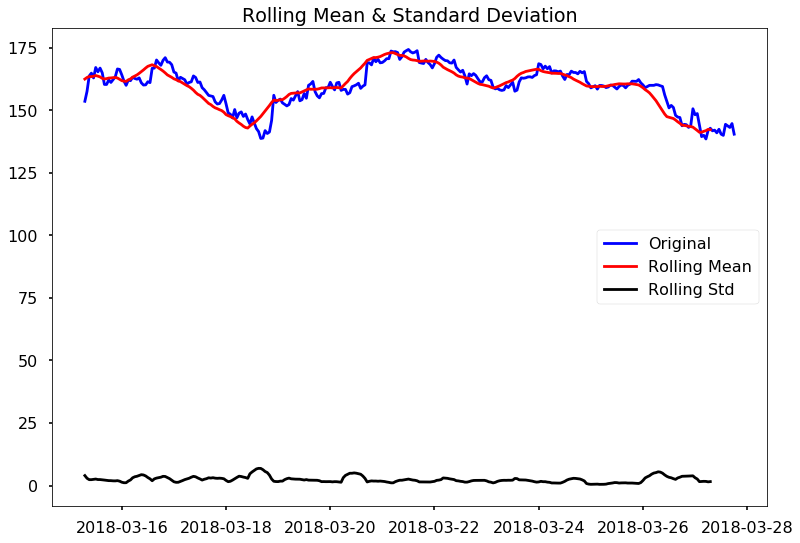

In [178]:
rollmean = pd.rolling_mean(data['open'], window=12)
rollstd = pd.rolling_std(data['open'], window=12)
plt.plot(data['open'], color='blue',label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [173]:
from statsmodels.tsa.stattools import adfuller

In [182]:
print('Results of Dickey-Fuller Test for Raw Open Data:')
dftest = adfuller(data['open'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Raw Open Data:
Test Statistic                  -2.631866
p-   value                       0.086588
#Lags Used                       0.000000
Number of Observations Used    299.000000
dtype: float64
Critical Value at 5% -2.87125541273


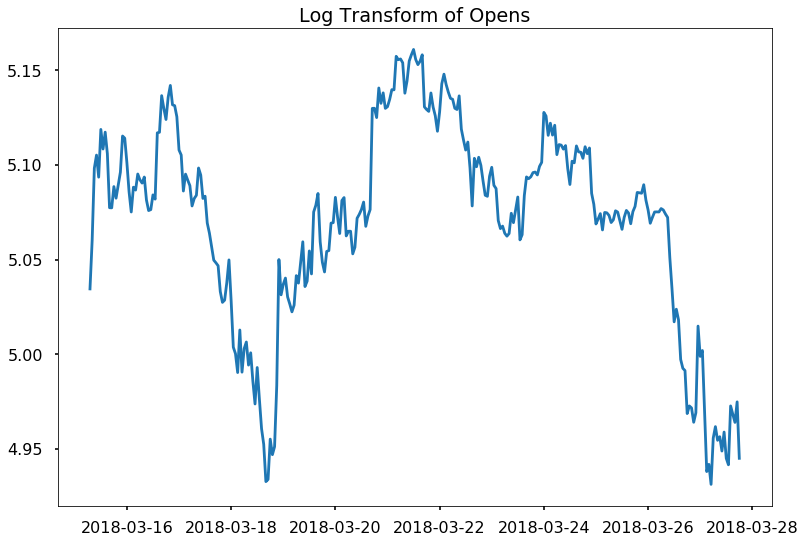

In [183]:
# Log transforming open
log_low = np.log(data['open'])
plt.plot(log_low)
plt.title('Log Transform of Opens')
plt.show()


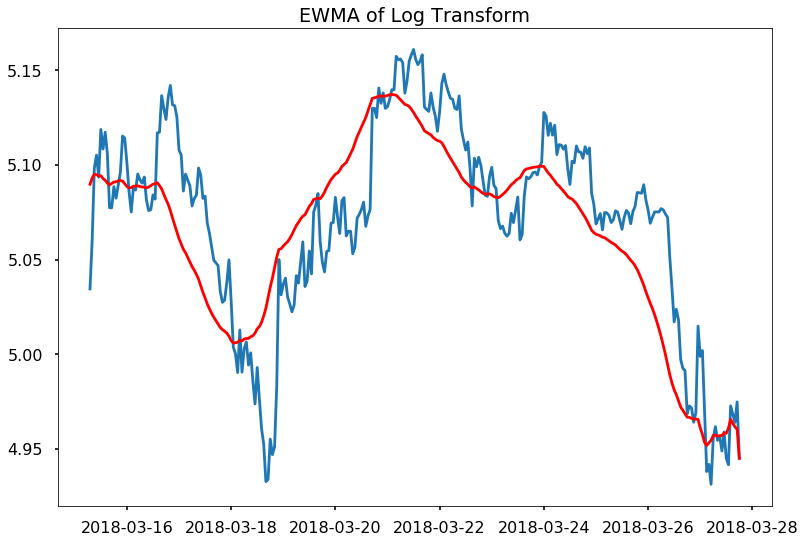

In [184]:
expwighted_avg = pd.ewma(log_low, halflife=12)
plt.plot(log_low)
plt.plot(expwighted_avg, color='red')
plt.title('EWMA of Log Transform')
plt.show()

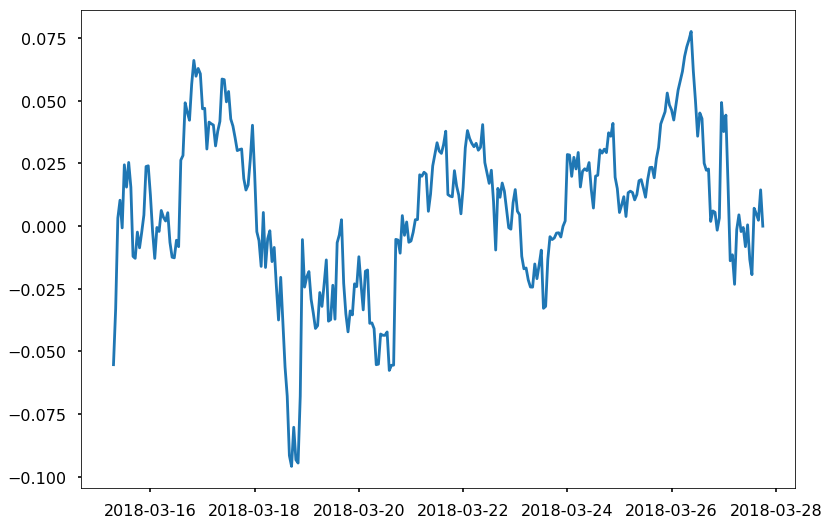

In [185]:
ts_log_ewma_diff = log_low - expwighted_avg
plt.plot(ts_log_ewma_diff)
plt.show()

In [186]:
print('Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:')
dftest = adfuller(ts_log_ewma_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -3.091652
p-value                          0.027177
#Lags Used                       0.000000
Number of Observations Used    299.000000
dtype: float64
Critical Value at 5% -2.87125541273


In [188]:
ts_log_ewma_diff

time
2018-03-27 18:00:00    0.000000
2018-03-27 17:00:00    0.014472
2018-03-27 16:00:00    0.002353
2018-03-27 15:00:00    0.004959
2018-03-27 14:00:00    0.007135
2018-03-27 13:00:00   -0.019359
2018-03-27 12:00:00   -0.013247
2018-03-27 11:00:00    0.000517
2018-03-27 10:00:00   -0.008187
2018-03-27 09:00:00   -0.000548
2018-03-27 08:00:00   -0.002157
2018-03-27 07:00:00    0.004509
2018-03-27 06:00:00   -0.001367
2018-03-27 05:00:00   -0.023207
2018-03-27 04:00:00   -0.011428
2018-03-27 03:00:00   -0.013804
2018-03-27 02:00:00    0.016398
2018-03-27 01:00:00    0.044301
2018-03-27 00:00:00    0.037732
2018-03-26 23:00:00    0.049323
2018-03-26 22:00:00    0.003265
2018-03-26 21:00:00   -0.001614
2018-03-26 20:00:00    0.005514
2018-03-26 19:00:00    0.006063
2018-03-26 18:00:00    0.001889
2018-03-26 17:00:00    0.022798
2018-03-26 16:00:00    0.022313
2018-03-26 15:00:00    0.025096
2018-03-26 14:00:00    0.042906
2018-03-26 13:00:00    0.045145
                         ...   
201

Trying out FB Prophet

In [194]:
!pip install fbprophet

  Using cached fbprophet-0.2.1.tar.gz
  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /Users/Dereck/Library/Caches/pip/wheels/e7/62/5b/94bb082348b1e1f45d3ab97a33982c5aaaefa7f2fecc1d3c89
Successfully built fbprophet
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [195]:
from fbprophet import Prophet

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first 80 percent of the history.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  weekly_seasonality: Fit weekly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  daily_seasonality: Fit daily seasonality.
 |      Can be 'auto', True, False, o

KeyError: 'y'

In [643]:
py_hour.tail(5)

,low,high,open,close,volume
time,,,,,
2018-03-30 10:00:00,116.10,120.98,118.83,116.19,13301.938975
2018-03-30 11:00:00,116.16,119.07,116.19,119.03,10686.674272
2018-03-30 12:00:00,117.26,120.75,119.03,120.54,18079.205816
2018-03-30 13:00:00,116.58,121.00,120.54,118.27,21426.979826
2018-03-30 14:00:00,117.05,119.00,118.24,117.18,13613.200351


Vector Auto Regressive Model

In [196]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [614]:
dfhour

,low,high,open,close,volume
time,,,,,
2018-03-15 07:00:00,153.63,157.99,153.63,157.62,25396.235430
2018-03-15 08:00:00,155.19,164.50,157.62,163.75,27718.493513
2018-03-15 09:00:00,162.50,166.25,163.74,164.87,16872.937206
2018-03-15 10:00:00,162.50,167.10,164.88,163.80,14329.361843
2018-03-15 11:00:00,162.97,167.49,162.97,167.13,15716.843668
2018-03-15 12:00:00,163.69,167.13,167.13,165.13,13011.873370
2018-03-15 13:00:00,162.53,167.50,165.41,166.89,17686.754898
2018-03-15 14:00:00,164.50,166.89,166.89,165.01,17435.343802
2018-03-15 15:00:00,157.10,165.00,165.00,160.36,36750.587895


In [242]:
model = VAR(dfhour)
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Mar, 2018
Time:                     16:47:55
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.9621
Nobs:                     299.000    HQIC:                   13.7394
Log likelihood:          -4123.14    FPE:                    798780.
AIC:                      13.5908    Det(Omega_mle):         723242.
--------------------------------------------------------------------
Results for equation low
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.980506         1.515321           -0.647           0.518
L1.low            0.092085         0.112697            0.817           0.415
L1.high          -0.157984         0.113146           -1.396           0.164
L

In [243]:
lag_order = results.k_ar
results.forecast(dfhour.values[-lag_order:], 1)

array([[   138.14514781,    141.47391277,    139.45433903,    139.84130801,
         16601.69677898]])

In [216]:
dfhour

,low,high,open,close,volume
time,,,,,
2018-03-15 07:00:00,153.63,157.99,153.63,157.62,25396.235430
2018-03-15 08:00:00,155.19,164.50,157.62,163.75,27718.493513
2018-03-15 09:00:00,162.50,166.25,163.74,164.87,16872.937206
2018-03-15 10:00:00,162.50,167.10,164.88,163.80,14329.361843
2018-03-15 11:00:00,162.97,167.49,162.97,167.13,15716.843668
2018-03-15 12:00:00,163.69,167.13,167.13,165.13,13011.873370
2018-03-15 13:00:00,162.53,167.50,165.41,166.89,17686.754898
2018-03-15 14:00:00,164.50,166.89,166.89,165.01,17435.343802
2018-03-15 15:00:00,157.10,165.00,165.00,160.36,36750.587895


In [217]:
test = public_client.get_product_historic_rates('LTC-USD', granularity = 900)
test

[[1522186200, 139.78, 139.94, 139.93, 139.9, 279.5031024],
 [1522185300, 139.64, 141.11, 140.79, 139.94, 2319.70838875],
 [1522184400, 139.27, 140.79, 139.36, 140.78, 1964.04599243],
 [1522183500, 139.23, 141.05, 139.59, 139.62, 5309.814159019999],
 [1522182600, 138.78, 140.14, 139.01, 139.59, 3478.76169374],
 [1522181700, 139, 139.12, 139.11, 139.01, 1650.6259983599998],
 [1522180800, 139.01, 139.36, 139.35, 139.11, 1994.1306604699998],
 [1522179900, 138.15, 139.35, 138.83, 139.34, 4106.06800011],
 [1522179000, 138.82, 139.57, 139.42, 138.83, 2539.1703666],
 [1522178100, 138.85, 139.88, 139.27, 139.41, 2024.5286996300006],
 [1522177200, 139.19, 140.24, 139.27, 139.27, 2610.39853773],
 [1522176300, 138.52, 139.6, 138.52, 139.33, 3552.68751375],
 [1522175400, 138.5, 140.46, 140.46, 138.52, 6387.27810731],
 [1522174500, 140.12, 140.58, 140.12, 140.45, 2272.7161165400003],
 [1522173600, 139.71, 140.5, 140.48, 140.21, 3426.5429921],
 [1522172700, 140.01, 141.43, 141, 140.48, 3689.817653370

In [226]:
df_fteen = df_maker(test)

In [246]:
df_fteen

,low,high,open,close,volume
time,,,,,
2018-03-24 18:30:00,164.68,164.90,164.68,164.90,286.483209
2018-03-24 18:45:00,164.90,165.61,164.90,165.60,2134.040809
2018-03-24 19:00:00,165.00,165.61,165.61,165.08,709.783143
2018-03-24 19:15:00,165.07,165.90,165.08,165.46,1984.411505
2018-03-24 19:30:00,165.06,165.45,165.45,165.19,1024.087166
2018-03-24 19:45:00,165.00,165.20,165.19,165.01,1099.351804
2018-03-24 20:00:00,165.00,166.00,165.01,165.81,2335.502363
2018-03-24 20:15:00,165.54,165.82,165.82,165.62,1010.794058
2018-03-24 20:30:00,164.91,165.56,165.55,165.38,1223.824408


In [17]:
def var_forecast(data):
    model = VAR(data)
    results = model.fit(1)
    results.summary()
    lag_order = results.k_ar
    return results.forecast(data.values[-lag_order:], 1)

# Which lag order do we pick?
We can see here that 1 gives us the lowest AIC

In [650]:
model = VAR(py_hour)
model.select_order(5)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0        24.37        24.43    3.835e+10        24.40
1       13.94*       14.32*   1.135e+06*       14.09*
2        13.96        14.65    1.154e+06        14.23
3        14.01        15.01    1.211e+06        14.41
4        14.04        15.35    1.250e+06        14.56
5        14.12        15.75    1.361e+06        14.77
* Minimum



{'aic': 1, 'bic': 1, 'fpe': 1, 'hqic': 1}

In [245]:
var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 900)))

array([[  139.62399898,   140.70325805,   140.04340372,   140.15177715,
         2220.66718476]])

In [406]:
guess_fteen = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 900)))

In [403]:
guess_hour = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)))

In [457]:
guess_fteen #low, high, open, close, volume

array([[  130.69024633,   131.91971056,   131.29337218,   131.28775578,
         3840.03461422]])

In [1005]:
guess_hour = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)))
print(guess_hour)
print(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)).tail(2))

[[   115.19893788    119.53767852    116.97239852    117.01084272
   38165.41373334]]
                        low    high    open   close        volume
time                                                             
2018-04-04 13:00:00  121.33  124.26  121.33  122.10  14909.938325
2018-04-04 14:00:00  115.80  122.35  122.10  116.99  52315.318174


In [1006]:
guess_hour_f = var_forecast(df_maker_future(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)))
print(guess_hour_f)
print(df_maker_future(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)).tail(2))

[[   116.63707619    119.03676719    117.81151479    117.89318491
   17446.40446612]]
                        low    high    open   close        volume
time                                                             
2018-04-04 14:00:00  115.80  122.35  122.10  116.99  52398.109408
2018-04-04 15:00:00  116.98  118.50  116.99  117.81  14754.863247


In [1003]:
guess_fteen = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 900)))
print(guess_fteen)
print(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 900)).tail(5))

[[  117.87724584   118.70159923   118.20110448   118.35096206
   2906.76733203]]
                        low    high    open   close        volume
time                                                             
2018-04-04 14:30:00  115.80  117.44  117.10  117.11  12114.389698
2018-04-04 14:45:00  116.90  118.00  117.11  116.99   8664.978409
2018-04-04 15:00:00  116.98  118.40  116.99  117.13   6366.602247
2018-04-04 15:15:00  117.13  118.50  117.13  117.72   5191.625297
2018-04-04 15:30:00  117.72  118.39  117.73  118.20   2815.006258


In [1004]:
guess_fteen_f = var_forecast(df_maker_future(public_client.get_product_historic_rates('LTC-USD', granularity = 900)))
print(guess_fteen_f)
print(df_maker_future(public_client.get_product_historic_rates('LTC-USD', granularity = 900)).tail(5))

[[  117.46301624   118.23151784   117.81064872   117.88591432
   1735.24616202]]
                        low    high    open   close       volume
time                                                            
2018-04-04 14:45:00  116.90  118.00  117.11  116.99  8723.713733
2018-04-04 15:00:00  116.98  118.40  116.99  117.13  6395.504234
2018-04-04 15:15:00  117.13  118.50  117.13  117.72  5187.727566
2018-04-04 15:30:00  117.72  118.39  117.73  118.20  2808.542058
2018-04-04 15:45:00  117.81  118.30  118.29  117.81   363.004820


In [613]:
guess_day = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600*24)))
np.round(guess_day)
print(np.round(guess_day))
print(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600*24)).tail(2))

[[  1.02000000e+02   1.17000000e+02   1.15000000e+02   1.11000000e+02
    6.35741000e+05]]
               low    high    open   close         volume
time                                                     
2018-03-28  130.11  139.99  134.64  131.70  297708.797637
2018-03-29  112.00  132.54  131.70  114.53  728203.310713


In [578]:
np.round(guess_day, 2)

array([[  1.21000000e+02,   1.34520000e+02,   1.31710000e+02,
          1.28280000e+02,   4.36084590e+05]])

Now that we have our predictions, let's keep track of how accurate they actually are

Append to list

Compare to truth

In [441]:
quarter_hour_guesses = []
hourly_guesses = []

In [ ]:
while datetime.datetime.now() < finish_time:
    guess_hour = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)))
    hourly_guesses.append(guess_hour)
    time.sleep(3600)

In [450]:
str(datetime.now())

'2018-03-28 12:53:41.427997'

In [518]:
df_hour_guess = pd.DataFrame(guess_hour, columns = ['plow', 'phigh', 'popen', 'pclose', 'pvolume'])

## Using GDAX module to make buys and sells

Buying: 


To avoid insufficient funds, we'll sacrifice pennies and floor our balance

In [14]:
auth_client = gdax.AuthenticatedClient('4cc77b036d89a0399fd397d6bff3b629', 'fpYNJkjphnHf0SbkJ65aiBtmG2FAJhiLxUHOqTlbnKUZSBh42CDjIkdBJZ/U/AOsrNhrEmzl+jFTEuf+vcIyew==', '2018arooooo')

In [5]:
balance_str = auth_client.get_accounts()[3].get('available')
balance = math.floor(float(balance_str)) - 1 # We're going to floor this float so we don't hit insufficient funds in making our orders
size_buy = '%.8f' % (balance / guess_hour[0][0])
buy_guess = '%.2f' % (guess_hour[0][0])

NameError: name 'guess_hour' is not defined

In [428]:
def buy_ltc(buy_guess = '%.2f' % (guess_hour[0][0]), size_buy = '%.8f' % (balance / guess_hour[0][0])):
    return auth_client.buy(price=buy_guess, size=size_buy, product_id='LTC-USD')

In [916]:
auth_client.buy(price='%.2f' % (guess_hour[0][0]), size='%.8f' % (balance / guess_hour[0][0]), product_id='LTC-USD')
#time.sleep(1800)
#auth_client.cancel_all(product_id='LTC-USD')


{'created_at': '2018-04-01T23:01:43.189656Z',
 'executed_value': '0.0000000000000000',
 'fill_fees': '0.0000000000000000',
 'filled_size': '0.00000000',
 'id': '7002a5c6-bd15-4894-bfe9-172b07539e6a',
 'post_only': False,
 'price': '113.45000000',
 'product_id': 'LTC-USD',
 'settled': False,
 'side': 'buy',
 'size': '0.90791100',
 'status': 'pending',
 'stp': 'dc',
 'time_in_force': 'GTC',
 'type': 'limit'}

In [913]:
auth_client.cancel_all(product = 'LTC-USD')

['45d97eda-40bb-40d1-b602-a801052621db']

In [831]:
size_buy

'-0.00881383'

Selling our coins

In [364]:
auth_client.get_accounts()[0].get('available') # checks how many coins we have

'0.74088895'

In [15]:
public_client = gdax.PublicClient()

In [36]:
# buy -> sell 
# This keeps checking until we fill that buy, then instantly place a sell order
#guess_hour = var_forecast(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)))
#pause.until(datetime.datetime.now().replace(microsecond=0,second=0,minute=0)+datetime.timedelta(hours=1, minutes = 3))
#print(datetime.datetime.now())
while True:
    data = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))
    guess_hour = var_forecast(data)
    bank = auth_client.get_accounts()
    balance_str = bank[0].get('available')
    balance = math.floor(float(balance_str)) - 1 # We're going to floor this float so we don't hit insufficient funds in making our orders
    #arima_mod_o = sm.tsa.ARIMA(df.open, order=(1,1,1), missing = 'drop').fit()
    #arima_mod_o.forecast(steps=1, exog = df.sentiment, alpha=0.05)
    #arima_mod_h = sm.tsa.ARIMA(df.high, order=(1,1,1), missing = 'drop').fit()
    #arima_mod_h.forecast(steps=1, exog = df.sentiment, alpha=0.05)
    #arima_mod_l = sm.tsa.ARIMA(df.low, order=(1,1,1), missing = 'drop').fit()
    #arima_mod_l.forecast(steps=1, exog = df.sentiment, alpha=0.05)
    #arima_mod_c = sm.tsa.ARIMA(df.close, order=(1,1,1), missing = 'drop').fit()
    #arima_mod_c.forecast(steps=1, exog = df.sentiment, alpha=0.05)
    sentiment_multiplier = 0.95
    #sentiment_multiplier = guess_hour[0][0] * arima
    bull = 0
    #if relative_strength_index(data, 14).tail(1).RSI_14 < 0.7: # RSI rules
        #bull = 1
    #if bull == 1:
    auth_client.buy(price='%.2f' % (guess_hour[0][0]), size='%.8f' % (balance / guess_hour[0][0]), product_id='LTC-USD')
    #else:
        #auth_client.buy(price='%.2f' % (guess_hour[0][0] - 1 ))
    hour_bought = 0
    bank = auth_client.get_accounts()
    text_file = open("results.txt", "w")
    text_file.write("USD Balance: ")
    text_file.write('%.2f' % (float(bank[0].get('available'))))
    text_file.write("\nLitecoin Balance: ")
    text_file.write('%.2f' % (float(bank[1].get('available'))))
    text_file.write("\nUSD in order: ")
    text_file.write('%.2f' % (float(bank[0].get('hold'))))
    text_file.write("\nLitecoins in order: ")
    text_file.write('%.2f' % (float(bank[1].get('hold'))))
    text_file.write("\n")
    text_file.write("\nHourly Forecasts: \n")
    text_file.write("Low: ")
    text_file.write('%.2f' % (float((guess_hour[0][0]))))
    text_file.write("\nHigh: ")
    text_file.write('%.2f' % (float((guess_hour[0][1]))))
    text_file.write("\nOpen: ")
    text_file.write('%.2f' % (float((guess_hour[0][2]))))
    text_file.write("\nClose: ")
    text_file.write('%.2f' % (float((guess_hour[0][3]))))
    text_file.close()
    while True:
        time.sleep(30)
        if float(bank[1].get('available')) != 0: # If we have more than 0 litecoins
            text_file = open("results.txt", "a")
            text_file.write("\nPast Fills:\n")
            #text_file.write("\n")
            text_file.write("\nBought at ")
            text_file.write('%.2f' % (float((guess_hour[0][0]))))
            text_file.write("\nTime: ")
            text_file.write(str(datetime.datetime.now()))
            text_file.close()
            #print("BOUGHT! $", guess_hour[0][0])
            auth_client.sell(price='%.2f' % (guess_hour[0][3]), # This is our predicted closing price
                    size=auth_client.get_accounts()[1].get('available'), 
                    product_id='LTC-USD')
            hour_bought = 1
            if float(bank[0].get('hold')) == 0 and hour_bought == 1:
                text_file = open("results.txt", "a")
                text_file.write("\nSold at ")
                text_file.write('%.2f' % (float((guess_hour[0][3]))))
                text_file.write("\nTime: ")
                text_file.write(str(datetime.datetime.now()))
                text_file.close()
                pause.until(datetime.datetime.now().replace(microsecond=0,second=0,minute=0)+datetime.timedelta(hours=1))
                False
            False
        if float(bank[0].get('hold')) != 0:
            if datetime.datetime.now() == datetime.datetime.now().replace(microsecond=0,second=0,minute=0)+datetime.timedelta(hours=1):
                auth_client.cancel_all(product = 'LTC-USD')
                False

KeyboardInterrupt: 

In [30]:
bank = auth_client.get_accounts()
bank
#bank[3].get('available')

[{'available': '104.40027568306505',
  'balance': '104.4002756830650500',
  'currency': 'USD',
  'hold': '0.0000000000000000',
  'id': '5155721e-ff62-40b7-bc6b-4eae81275880',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77'},
 {'available': '0',
  'balance': '0.0000000000000000',
  'currency': 'LTC',
  'hold': '0.0000000000000000',
  'id': '262a80ef-8b7f-4247-887f-061eb66ac233',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77'},
 {'available': '0',
  'balance': '0.0000000000000000',
  'currency': 'ETH',
  'hold': '0.0000000000000000',
  'id': '32cc0d09-8fd5-420b-a42c-74cd38b95760',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77'},
 {'available': '0.000000001748708',
  'balance': '0.0000000017487080',
  'currency': 'BTC',
  'hold': '0.0000000000000000',
  'id': '5622e726-db2d-41e8-931a-c95d958d5161',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77'},
 {'available': '0',
  'balance': '0.0000000000000000',
  'currency': 'BCH',
  'hold': '0.0000000000000000',
  'id

In [11]:
pause.until(datetime.datetime.now().replace(microsecond=0,second=0,minute=0)+datetime.timedelta(hours=1, minutes = 2))


KeyboardInterrupt: 

In [876]:
bank = auth_client.get_accounts()

In [1021]:
tomorrow = datetime.replace(datetime.now() + timedelta(days=0), 
                     hour=1, minute=0, second=0)
delta = tomorrow - datetime.now()
delta.seconds

47392

In [1034]:
datetime.now == datetime.now().replace(microsecond=0,second=0,minute=0)+timedelta(hours=1)

False

In [888]:
bank = auth_client.get_accounts()
print(bank[3].get('hold'))
if float(bank[3].get('hold')) == 0:
    print("BOUGHT!")

0.0000000000000000
BOUGHT!


bull market rules - vwap increasing, RSI under 30
bear market rules - vwap decreasing, RSI over 70

check balance - 
bank = auth_client.get_accounts()

bank[0].get('available') for coins in bag
bank[0].get('hold') for coins in order
bank[3].get('available') for usd
bank[3].get('hold') for usd in order

if float(bank[0].get('available')) > 0: # meaning we have coins not in an order
    sell
if float(bank[3].get('available')) > 2: # meaning we have usd not in an order, 2 is in case we have pennies leftover
    buy
if float(bank[0].get('hold')) > 0 and time is still within our prediction window: 
    wait?


generate hourly prediction
generate 15 min prediction
set buy 
if buy unfulfilled, cancel after X mins - this would mean that the price didn't hit the low
if buy filled, move onto sell, otherwise regenerate predictions

set sell
if sell unfulfilled, cancel after X mins - this would mean the price didn't hit the high
if cancelled, what do I do? 
    * option 1: set sell for bought price and hope
    * option 2: sell at a loss??? market sell if price drops below 1% of bought in price?
    * option 3: 

if sell filled, move back into buy

check if balance is less than what we started with, if less than 3% then stop

In [528]:
df = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))

In [503]:
def vwap(df):
    
    v = df.volume.values
    h = df.high.values
    l = df.low.values
    c = df.close.values
    o = df.open.values

    df['vwap_numpy'] = np.cumsum(v*(o+h+l+c)/4) / np.cumsum(v)
    return df

In [899]:
vwap(df).vwap_numpy.diff()

time
2018-03-17 05:00:00         NaN
2018-03-17 06:00:00   -0.339913
2018-03-17 07:00:00    0.030404
2018-03-17 08:00:00    0.387483
2018-03-17 09:00:00    0.291288
2018-03-17 10:00:00    0.055283
2018-03-17 11:00:00    0.014883
2018-03-17 12:00:00   -0.461744
2018-03-17 13:00:00   -0.567893
2018-03-17 14:00:00   -0.483025
2018-03-17 15:00:00   -0.749071
2018-03-17 16:00:00   -0.365711
2018-03-17 17:00:00   -0.275905
2018-03-17 18:00:00   -0.781182
2018-03-17 19:00:00   -0.789040
2018-03-17 20:00:00   -0.533581
2018-03-17 21:00:00   -0.286109
2018-03-17 22:00:00   -0.056113
2018-03-17 23:00:00   -0.162120
2018-03-18 00:00:00   -0.584338
2018-03-18 01:00:00   -0.457068
2018-03-18 02:00:00   -0.851073
2018-03-18 03:00:00   -0.503779
2018-03-18 04:00:00   -0.312735
2018-03-18 05:00:00   -0.160731
2018-03-18 06:00:00   -0.090095
2018-03-18 07:00:00   -0.069337
2018-03-18 08:00:00   -0.085967
2018-03-18 09:00:00   -0.105464
2018-03-18 10:00:00   -0.262112
                         ...   
201

In [499]:
def relative_strength_index(df, n):
    """Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    df = df.reset_index()
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'high'] - df.loc[i, 'high']
        DoMove = df.loc[i, 'low'] - df.loc[i + 1, 'low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else: UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else: DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span = n, min_periods = n).mean())
    NegDI = pd.Series(DoI.ewm(span = n, min_periods = n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))
    df = df.join(RSI)
    return df

In [1000]:
relative_strength_index(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)), 14).tail(1).RSI_14>.5

298    True
Name: RSI_14, dtype: bool

In [501]:
def bollinger_bands(df, n):
    """
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['close'].rolling(n, min_periods=n).mean())
    MSD = pd.Series(df['close'].rolling(n, min_periods=n).std())
    b1 = 4 * MSD / MA
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))
    df = df.join(B1)
    b2 = (df['close'] - MA + 2 * MSD) / (4 * MSD)
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [502]:
bollinger_bands(df, 20)

,low,high,open,close,volume,vwap_numpy,BollingerB_20,Bollinger%b_20
time,,,,,,,,
2018-03-16 08:00:00,161.01,162.98,162.98,161.02,5578.340756,161.997500,NaN,NaN
2018-03-16 09:00:00,159.44,161.06,161.01,160.02,8133.873062,161.039507,NaN,NaN
2018-03-16 10:00:00,159.35,160.41,160.12,160.19,5774.605035,160.736652,NaN,NaN
2018-03-16 11:00:00,159.71,162.00,160.20,161.45,4691.737986,160.756706,NaN,NaN
2018-03-16 12:00:00,160.58,161.65,161.45,161.01,5709.685208,160.836137,NaN,NaN
2018-03-16 13:00:00,160.62,167.00,161.09,166.82,30800.397177,162.382212,NaN,NaN
2018-03-16 14:00:00,166.41,169.60,166.83,166.88,24434.595966,163.831178,NaN,NaN
2018-03-16 15:00:00,166.87,171.00,166.88,170.14,23096.378837,164.875091,NaN,NaN
2018-03-16 16:00:00,169.00,170.95,170.14,169.00,16872.624634,165.535660,NaN,NaN


In [945]:
auth_client.get_fills(product_id = "LTC-USD")[0][0:5]

In [952]:
last_five = fills[0][0:5]

In [967]:
last_five

[{'created_at': '2018-04-01T22:59:50.797Z',
  'fee': '0.0000000000000000',
  'liquidity': 'M',
  'order_id': '14fff44f-6ca0-4138-9642-daa785bc7d07',
  'price': '114.62000000',
  'product_id': 'LTC-USD',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77',
  'settled': True,
  'side': 'sell',
  'size': '0.89914512',
  'trade_id': 28367246,
  'usd_volume': '103.0600136544000000',
  'user_id': '59b8a9d9d752f10164718081'},
 {'created_at': '2018-04-01T22:26:54.04Z',
  'fee': '0.0000000000000000',
  'liquidity': 'M',
  'order_id': 'a0a76a80-c259-4500-82b0-4bab09bc70b5',
  'price': '114.55000000',
  'product_id': 'LTC-USD',
  'profile_id': '1afbebb6-ff53-4377-903c-e1cd81ba1d77',
  'settled': True,
  'side': 'buy',
  'size': '0.89914512',
  'trade_id': 28366835,
  'usd_volume': '102.9970734960000000',
  'user_id': '59b8a9d9d752f10164718081'},
 {'created_at': '2018-03-31T12:42:58.059Z',
  'fee': '0.0000000000000000',
  'liquidity': 'M',
  'order_id': '69355175-98f7-4bbe-b617-73f073c6b18c',
 

In [987]:
for i, stuff in enumerate(auth_client.get_fills(product_id = "LTC-USD")[0][0:5]):
    line1 = last_five[i].get('side') + ' at ' + last_five[i].get('created_at')
    line2 = last_five[i].get('size')
    line3 = '$' + last_five[i].get('price')
    text_file = open("results.txt", "a")
    text_file.write('\n')
    text_file.write(line1)
    text_file.write('\n')
    text_file.write(line2)
    text_file.write('\n')
    text_file.write(line3)
    text_file.write('\n')
    text_file.close()

In [984]:
line1 = last_five[i].get('side') + ' at ' + last_five[i].get('created_at')
line1


'sell at 2018-03-30T16:30:20.211Z'

## Graphs

In [617]:
import pyflux as pf
#from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [674]:
py_hour = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))
py_hour_stationary = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))

In [716]:
py_hour

,low,high,open,close,volume
time,,,,,
2018-03-18 06:00:00,147.50,149.78,148.86,149.38,8006.972960
2018-03-18 07:00:00,147.00,149.38,149.38,147.59,5617.979155
2018-03-18 08:00:00,147.15,149.71,147.57,148.54,7124.900279
2018-03-18 09:00:00,146.09,148.95,148.53,146.33,7842.390910
2018-03-18 10:00:00,144.50,147.00,146.33,144.56,15415.134182
2018-03-18 11:00:00,143.80,147.97,144.57,147.51,13784.369182
2018-03-18 12:00:00,144.95,148.50,147.38,144.96,10979.426630
2018-03-18 13:00:00,142.00,145.55,144.96,142.67,22744.849899
2018-03-18 14:00:00,137.12,143.11,142.70,141.25,76478.824254


In [727]:
pymodel = pf.VAR(data=py_hour, lags=1, integ=1)

In [728]:
x = pymodel.fit()
x.summary()

VAR(1)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced low,Differenced high,Di Method: OLS                                       
Start Date: 2018-03-18 07:00:00                         Log Likelihood: -4373.6254                        
End Date: 2018-03-30 16:00:00                           AIC: 8837.2507                                    
Number of observations: 297                             BIC: 9003.4687                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced low Constant                 -0.0627    0.0798     -0.7867  0.4314   (-0.2191 | 0.0936)       
Differenced low AR(1)                

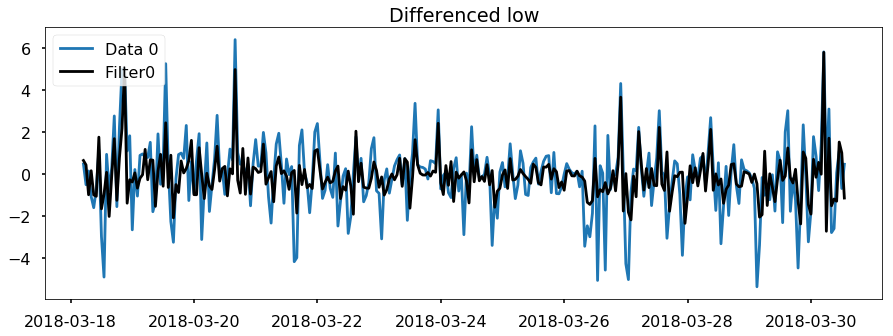

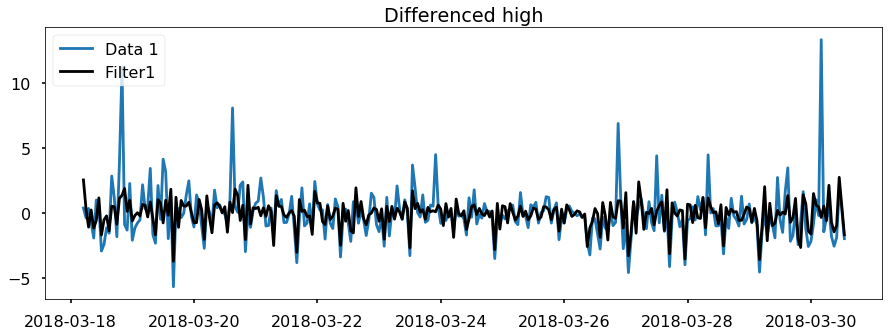

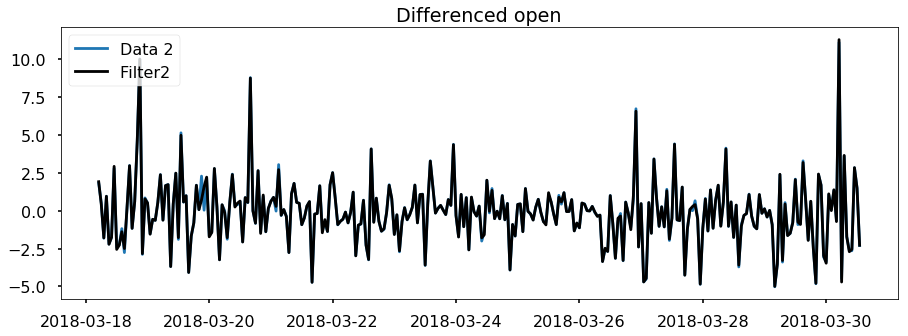

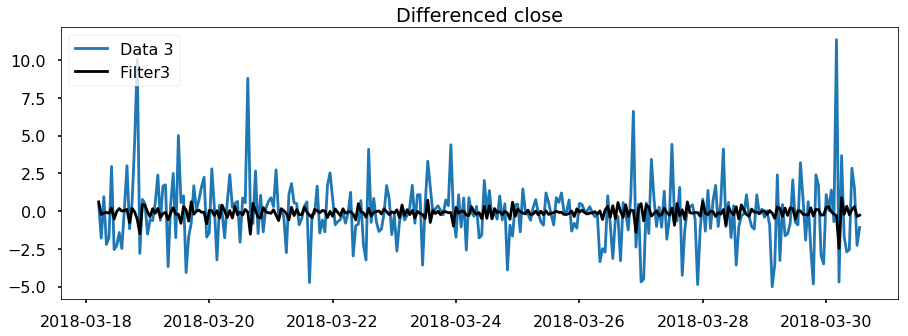

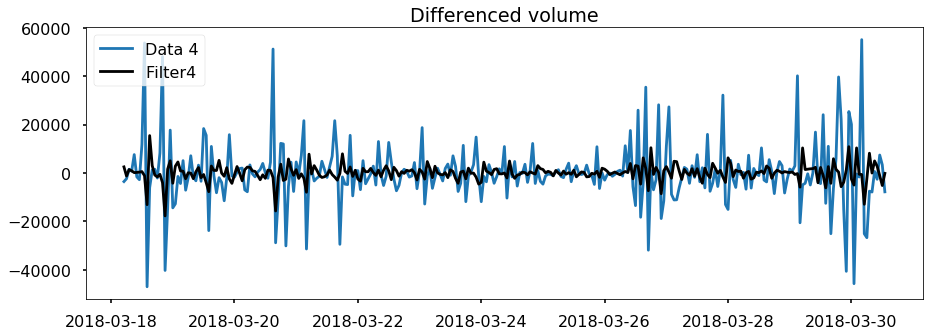

In [624]:
pymodel.plot_fit(figsize=(15,5))


In [722]:
py_hour

,low,high,open,close,volume
time,,,,,
2018-03-18 06:00:00,147.50,149.78,148.86,149.38,8006.972960
2018-03-18 07:00:00,147.00,149.38,149.38,147.59,5617.979155
2018-03-18 08:00:00,147.15,149.71,147.57,148.54,7124.900279
2018-03-18 09:00:00,146.09,148.95,148.53,146.33,7842.390910
2018-03-18 10:00:00,144.50,147.00,146.33,144.56,15415.134182
2018-03-18 11:00:00,143.80,147.97,144.57,147.51,13784.369182
2018-03-18 12:00:00,144.95,148.50,147.38,144.96,10979.426630
2018-03-18 13:00:00,142.00,145.55,144.96,142.67,22744.849899
2018-03-18 14:00:00,137.12,143.11,142.70,141.25,76478.824254


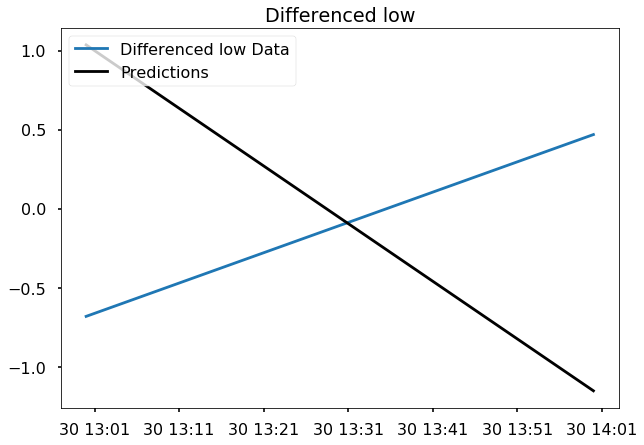

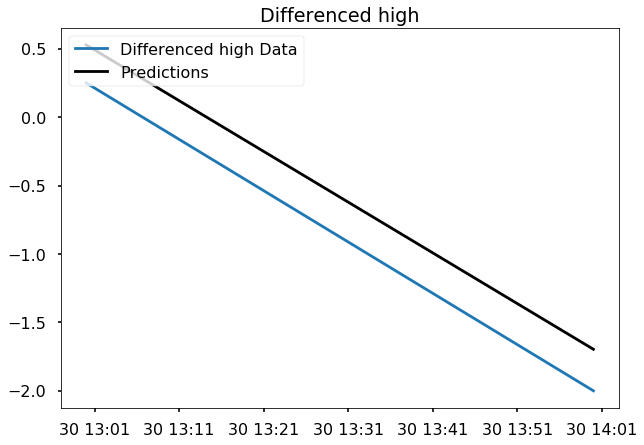

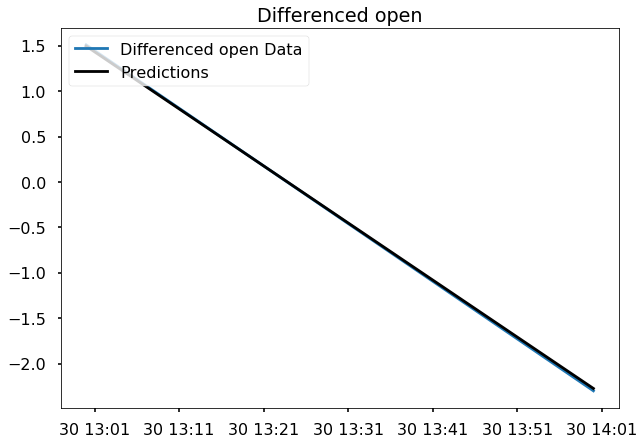

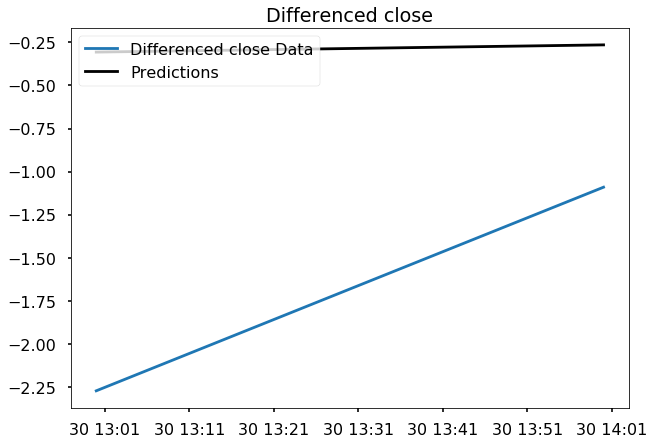

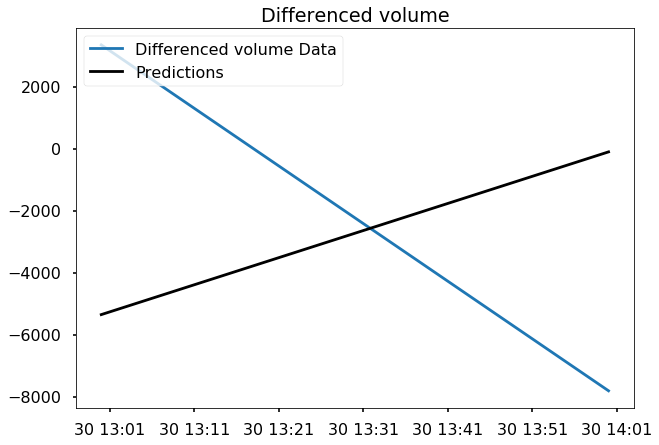

In [628]:
pymodel.plot_predict_is(h=2)

In [725]:
pymodel.predict_is(h=5)

,Differenced low,Differenced high,Differenced open,Differenced close,Differenced volume
time,,,,,
2018-03-30 12:00:00,1.588597,2.837264,2.852734,0.276054,-1402.604398
2018-03-30 13:00:00,1.050234,0.536686,1.495224,-0.285454,-5343.967275
2018-03-30 14:00:00,-1.149871,-1.719339,-2.275588,-0.261788,-171.097265
2018-03-30 15:00:00,-1.195007,0.095632,-1.064649,0.485635,3846.813182
2018-03-30 16:00:00,0.218048,-0.210002,-1.086604,-0.219939,-4576.748613


In [933]:
py_hour.tail(5)

,low,high,open,close,volume
time,,,,,
2018-03-30 12:00:00,117.26,120.75,119.03,120.54,18079.205816
2018-03-30 13:00:00,116.58,121.00,120.54,118.27,21426.979826
2018-03-30 14:00:00,117.05,119.00,118.24,117.18,13613.200351
2018-03-30 15:00:00,113.50,117.18,117.10,116.09,31910.520037
2018-03-30 16:00:00,112.56,117.00,116.09,114.14,34921.602605


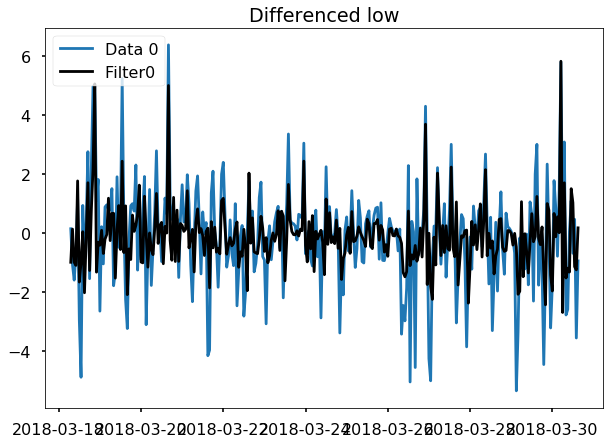

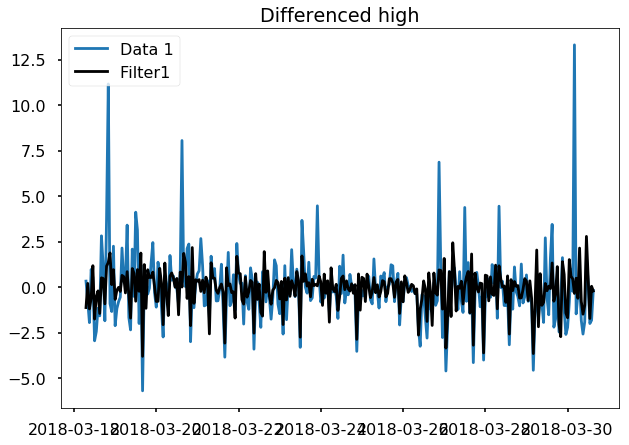

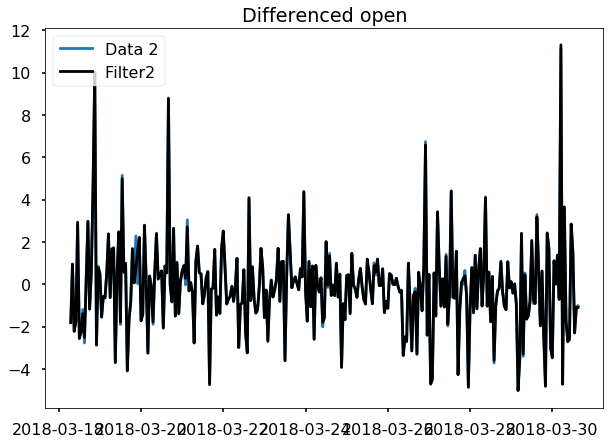

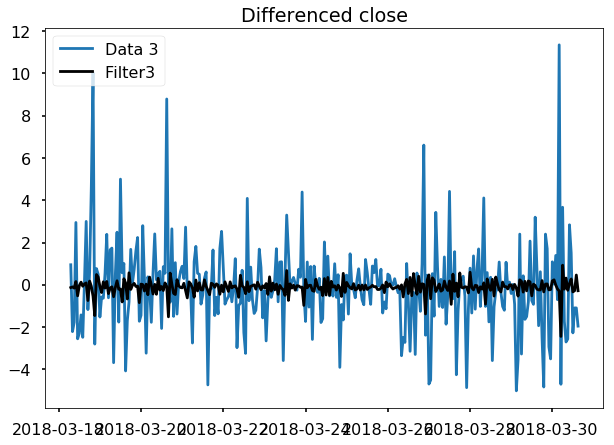

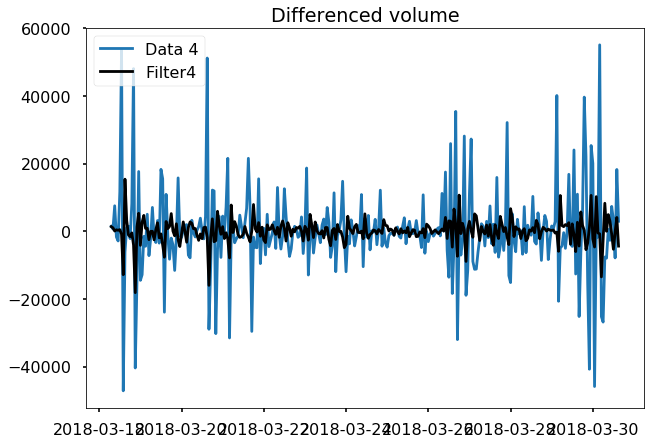

In [934]:
pymodel.plot_fit()

In [730]:
pymodel.plot_predict()

LinAlgError: singular matrix

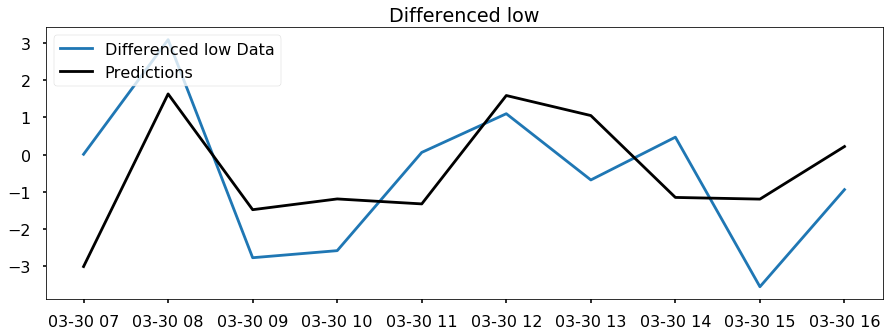

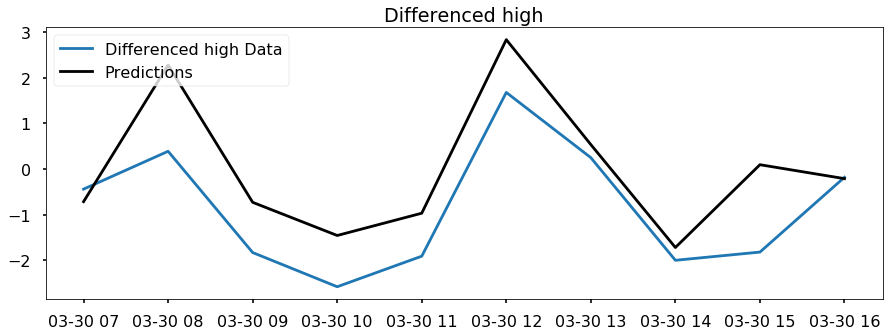

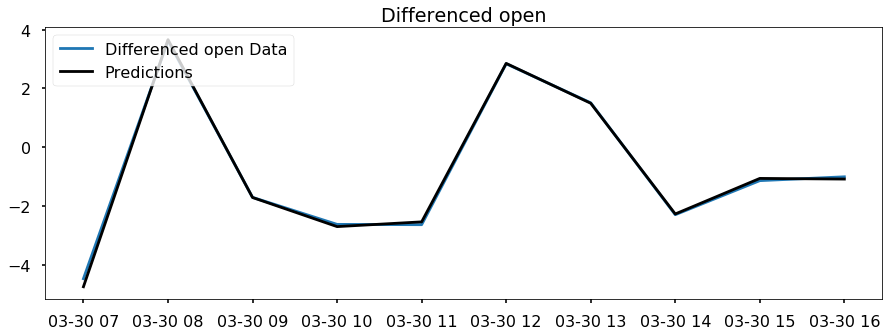

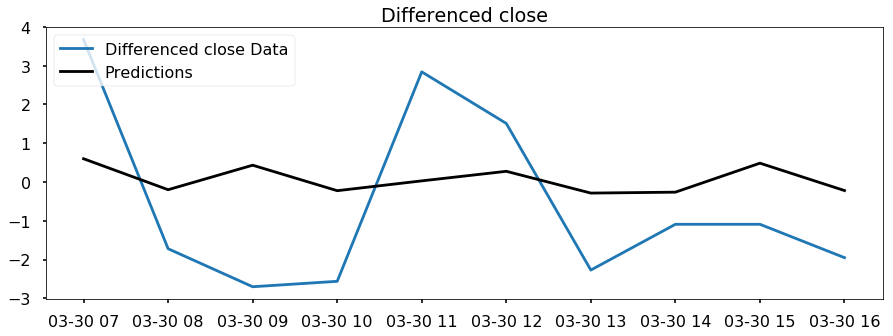

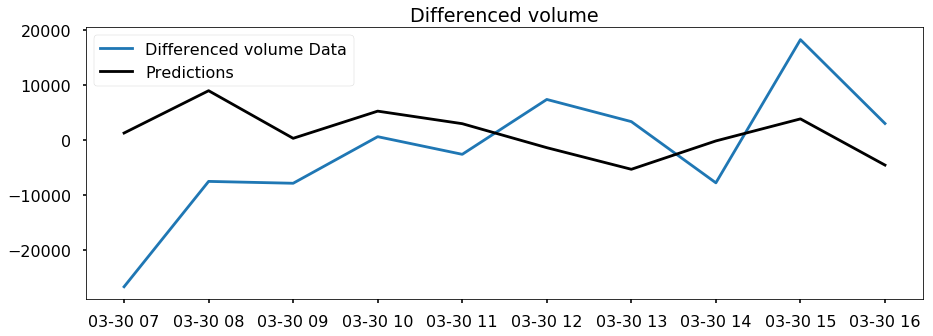

In [825]:
pymodel.plot_predict_is(h=10, fit_once = 1, figsize=((15,5)))

In [646]:
print('Results of Dickey-Fuller Test for Raw Open Data:')
dftest = adfuller(py_hour['open'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Raw Open Data:
Test Statistic                  -0.150153
p-   value                       0.944208
#Lags Used                       0.000000
Number of Observations Used    298.000000
dtype: float64
Critical Value at 5% -2.87128818434


In [647]:
print('Results of Dickey-Fuller Test for Raw Open Data:')
dftest = adfuller(np.log(py_hour['open']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

Results of Dickey-Fuller Test for Raw Open Data:
Test Statistic                   0.093410
p-   value                       0.965608
#Lags Used                       1.000000
Number of Observations Used    297.000000
dtype: float64
Critical Value at 5% -2.87132117783


Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -2.9852
p-value                          0.0363
#Lags Used                       1.0000
Number of Observations Used    297.0000
dtype: float64
Critical Value at 5% -2.87132117783


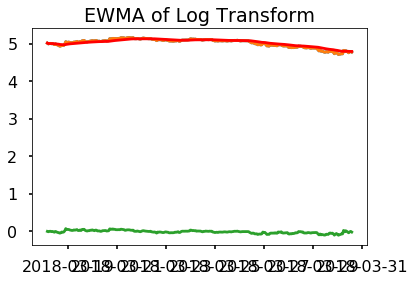

In [653]:
log_low = np.log(data['open'])
plt.plot(log_low)
plt.title('Log Transform of Opens')
#plt.show()
expwighted_avg = pd.ewma(log_low, halflife=12)
plt.plot(log_low)
plt.plot(expwighted_avg, color='red')
plt.title('EWMA of Log Transform')
#plt.show()
ts_log_ewma_diff = log_low - expwighted_avg
plt.plot(ts_log_ewma_diff)
#plt.show()
print('Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:')
dftest = adfuller(ts_log_ewma_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
print('Critical Value at 5%', list(dftest[4].items())[1][1])

In [657]:
np.exp(ts_log_ewma_diff + expwighted_avg)

time
2018-03-18 04:00:00    150.33
2018-03-18 05:00:00    147.02
2018-03-18 06:00:00    148.86
2018-03-18 07:00:00    149.38
2018-03-18 08:00:00    147.57
2018-03-18 09:00:00    148.53
2018-03-18 10:00:00    146.33
2018-03-18 11:00:00    144.57
2018-03-18 12:00:00    147.38
2018-03-18 13:00:00    144.96
2018-03-18 14:00:00    142.70
2018-03-18 15:00:00    141.52
2018-03-18 16:00:00    138.76
2018-03-18 17:00:00    138.92
2018-03-18 18:00:00    141.91
2018-03-18 19:00:00    140.75
2018-03-18 20:00:00    141.35
2018-03-18 21:00:00    145.99
2018-03-18 22:00:00    156.03
2018-03-18 23:00:00    153.15
2018-03-19 00:00:00    154.00
2018-03-19 01:00:00    154.51
2018-03-19 02:00:00    152.98
2018-03-19 03:00:00    152.41
2018-03-19 04:00:00    151.78
2018-03-19 05:00:00    152.32
2018-03-19 06:00:00    154.71
2018-03-19 07:00:00    154.10
2018-03-19 08:00:00    155.77
2018-03-19 09:00:00    157.50
                        ...  
2018-03-29 09:00:00    121.52
2018-03-29 10:00:00    119.90
2018-

Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -2.460126
p-value                          0.125480
#Lags Used                      16.000000
Number of Observations Used    282.000000
dtype: float64
Critical Value at 5% -2.87184431801
Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -3.023917
p-value                          0.032720
#Lags Used                       5.000000
Number of Observations Used    293.000000
dtype: float64
Critical Value at 5% -2.87145541608
Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -4.176029
p-value                          0.000723
#Lags Used                       0.000000
Number of Observations Used    298.000000
dtype: float64
Critical Value at 5% -2.87128818434
Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:
Test Statistic                  -2.876145
p-value      

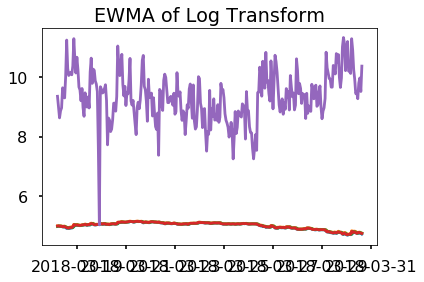

In [693]:
for column in data:
    log_low = np.log(data[column])
    plt.plot(log_low)
    plt.title('Log Transform of Opens')
    #plt.show()
    expwighted_avg = pd.ewma(log_low, halflife=8)
    #plt.plot(log_low)
    #plt.plot(expwighted_avg, color='red')
    plt.title('EWMA of Log Transform')
    #plt.show()
    data[column] =  log_low - expwighted_avg
    
    #plt.plot(ts_log_ewma_diff)
    #plt.show()
    print('Results of Dickey-Fuller Test for Difference of Log Transform and EWMA:')
    dftest = adfuller(data[column], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    print('Critical Value at 5%', list(dftest[4].items())[1][1])

In [689]:
data = py_hour_stationary

In [715]:
py_hour = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))
py_hour_stationary = df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600))
data = py_hour

In [694]:
data

,low,high,open,close,volume
time,,,,,
2018-03-18 05:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-18 06:00:00,0.001559,0.001151,0.005950,0.001443,-0.176735
2018-03-18 07:00:00,-0.001171,-0.000971,0.006015,-0.006764,-0.338510
2018-03-18 08:00:00,-0.000108,0.000886,-0.004426,-0.000249,-0.072299
2018-03-18 09:00:00,-0.005605,-0.003211,0.001573,-0.011642,0.018067
2018-03-18 10:00:00,-0.013161,-0.013034,-0.010617,-0.018937,0.551817
2018-03-18 11:00:00,-0.014729,-0.005279,-0.018571,0.001034,0.359698
2018-03-18 12:00:00,-0.005641,-0.001420,0.000566,-0.013681,0.110244
2018-03-18 13:00:00,-0.022186,-0.018193,-0.013539,-0.025067,0.710033


In [695]:
stationary_guess = var_forecast(data)
print(stationary_guess)
#print(df_maker(public_client.get_product_historic_rates('LTC-USD', granularity = 3600)).tail(2))

[[-0.01925777 -0.01645515 -0.0209316  -0.01546396  0.16343974]]


In [697]:
data.append(pd.DataFrame(stationary_guess))

,low,high,open,close,volume,0,1,2,3,4
2018-03-18 05:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2018-03-18 06:00:00,0.001559,0.001151,0.005950,0.001443,-0.176735,NaN,NaN,NaN,NaN,NaN
2018-03-18 07:00:00,-0.001171,-0.000971,0.006015,-0.006764,-0.338510,NaN,NaN,NaN,NaN,NaN
2018-03-18 08:00:00,-0.000108,0.000886,-0.004426,-0.000249,-0.072299,NaN,NaN,NaN,NaN,NaN
2018-03-18 09:00:00,-0.005605,-0.003211,0.001573,-0.011642,0.018067,NaN,NaN,NaN,NaN,NaN
2018-03-18 10:00:00,-0.013161,-0.013034,-0.010617,-0.018937,0.551817,NaN,NaN,NaN,NaN,NaN
2018-03-18 11:00:00,-0.014729,-0.005279,-0.018571,0.001034,0.359698,NaN,NaN,NaN,NaN,NaN
2018-03-18 12:00:00,-0.005641,-0.001420,0.000566,-0.013681,0.110244,NaN,NaN,NaN,NaN,NaN
2018-03-18 13:00:00,-0.022186,-0.018193,-0.013539,-0.025067,0.710033,NaN,NaN,NaN,NaN,NaN
2018-03-18 14:00:00,-0.048972,-0.030072,-0.025063,-0.030048,1.647362,NaN,NaN,NaN,NaN,NaN


In [698]:
expwighted_avg

time
2018-03-18 05:00:00     9.357533
2018-03-18 06:00:00     9.164803
2018-03-18 07:00:00     8.972238
2018-03-18 08:00:00     8.943650
2018-03-18 09:00:00     8.949232
2018-03-18 10:00:00     9.091288
2018-03-18 11:00:00     9.171593
2018-03-18 12:00:00     9.193535
2018-03-18 13:00:00     9.322061
2018-03-18 14:00:00     9.597407
2018-03-18 15:00:00     9.690849
2018-03-18 16:00:00     9.737767
2018-03-18 17:00:00     9.782867
2018-03-18 18:00:00     9.828058
2018-03-18 19:00:00     9.856874
2018-03-18 20:00:00     9.914366
2018-03-18 21:00:00    10.062720
2018-03-18 22:00:00    10.118463
2018-03-18 23:00:00    10.120680
2018-03-19 00:00:00    10.176029
2018-03-19 01:00:00    10.184436
2018-03-19 02:00:00    10.134159
2018-03-19 03:00:00    10.080128
2018-03-19 04:00:00     9.997426
2018-03-19 05:00:00     9.961982
2018-03-19 06:00:00     9.870585
2018-03-19 07:00:00     9.761791
2018-03-19 08:00:00     9.735578
2018-03-19 09:00:00     9.699383
2018-03-19 10:00:00     9.636227
     

In [709]:
expweighted_avg = pd.ewma(stationary_guess, halflife=8)

In [713]:
expweighted_avg

array([[-0.01925777, -0.01645515, -0.0209316 , -0.01546396,  0.16343974]])

In [765]:
data = py_hour

In [766]:
data_stationary = data.diff()

In [767]:
data_stationary

,low,high,open,close,volume
time,,,,,
2018-03-18 06:00:00,NaN,NaN,NaN,NaN,NaN
2018-03-18 07:00:00,-0.50,-0.40,0.52,-1.79,-2388.993805
2018-03-18 08:00:00,0.15,0.33,-1.81,0.95,1506.921124
2018-03-18 09:00:00,-1.06,-0.76,0.96,-2.21,717.490631
2018-03-18 10:00:00,-1.59,-1.95,-2.20,-1.77,7572.743272
2018-03-18 11:00:00,-0.70,0.97,-1.76,2.95,-1630.765000
2018-03-18 12:00:00,1.15,0.53,2.81,-2.55,-2804.942552
2018-03-18 13:00:00,-2.95,-2.95,-2.42,-2.29,11765.423269
2018-03-18 14:00:00,-4.88,-2.44,-2.26,-1.42,53733.974355


In [768]:
data_stationary = data_stationary.iloc[1:]

In [769]:
data_stationary

,low,high,open,close,volume
time,,,,,
2018-03-18 07:00:00,-0.50,-0.40,0.52,-1.79,-2388.993805
2018-03-18 08:00:00,0.15,0.33,-1.81,0.95,1506.921124
2018-03-18 09:00:00,-1.06,-0.76,0.96,-2.21,717.490631
2018-03-18 10:00:00,-1.59,-1.95,-2.20,-1.77,7572.743272
2018-03-18 11:00:00,-0.70,0.97,-1.76,2.95,-1630.765000
2018-03-18 12:00:00,1.15,0.53,2.81,-2.55,-2804.942552
2018-03-18 13:00:00,-2.95,-2.95,-2.42,-2.29,11765.423269
2018-03-18 14:00:00,-4.88,-2.44,-2.26,-1.42,53733.974355
2018-03-18 15:00:00,0.94,-1.16,-1.18,-2.48,-47065.772354


In [770]:
stationary_guess = var_forecast(data_stationary)
print(stationary_guess)

[[ -1.30881658e+00  -1.59940620e+00  -1.94382409e+00  -1.51452991e-01
    2.08608919e+03]]


In [790]:
stationary_guess

array([[ -1.30881658e+00,  -1.59940620e+00,  -1.94382409e+00,
         -1.51452991e-01,   2.08608919e+03]])

In [803]:
predictions = data.tail(1)

In [804]:
predictions = predictions.append(pd.DataFrame(stationary_guess, columns = ['low', 'high', 'open', 'close', 'volume']))

In [806]:
predictions = predictions.append(predictions.sum(), ignore_index = True)

In [808]:
predictions = predictions.iloc[2::]

In [809]:
predictions

,low,high,open,close,volume
2,111.251183,115.400594,114.146176,113.988547,37007.691799


In [811]:
asdf = var_forecast(py_hour)
print(asdf)

[[   112.14028335    116.32314795    114.13180837    114.09404853
   32525.28917974]]
